In [3]:
# Imports
import os
import numpy as np
import pandas as pd

In [5]:
file_path = '/Users/aleksandragarbat/Desktop/Thesis/Interests.xlsx'
#jobs rated in 7 point scale (1=the lowest relevance)
df = pd.read_excel(file_path)
df.head()

,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Data Value,Date,Domain Source
0,11-1011.00,Chief Executives,1.B.1.a,Realistic,OI,Occupational Interests,1.30,11/2023,Machine Learning
1,11-1011.00,Chief Executives,1.B.1.b,Investigative,OI,Occupational Interests,3.24,11/2023,Machine Learning
2,11-1011.00,Chief Executives,1.B.1.c,Artistic,OI,Occupational Interests,2.08,11/2023,Machine Learning
3,11-1011.00,Chief Executives,1.B.1.d,Social,OI,Occupational Interests,3.52,11/2023,Machine Learning
4,11-1011.00,Chief Executives,1.B.1.e,Enterprising,OI,Occupational Interests,6.88,11/2023,Machine Learning


In [7]:
#selected columns
df_selected = df[['Title', 'Element Name', 'Data Value']]
print(df_selected.head())


              Title   Element Name  Data Value
0  Chief Executives      Realistic        1.30
1  Chief Executives  Investigative        3.24
2  Chief Executives       Artistic        2.08
3  Chief Executives         Social        3.52
4  Chief Executives   Enterprising        6.88


In [9]:
#pivoting data
df_pivot = df_selected.pivot_table(index='Title', columns='Element Name', values='Data Value', aggfunc='first')
df_pivot = df_pivot.reset_index()
df_pivot.columns.name = None
print(df_pivot.head())


                      Title  Artistic  Conventional  Enterprising  \
0  Accountants and Auditors      1.09          7.00          3.86   
1                    Actors      7.00          1.67          4.00   
2                 Actuaries      1.18          6.24          3.41   
3            Acupuncturists      2.12          3.11          1.77   
4         Acute Care Nurses      1.48          3.49          1.62   

   First Interest High-Point  Investigative  Realistic  \
0                        6.0           3.57       1.14   
1                        3.0           2.13       2.31   
2                        6.0           4.44       1.81   
3                        4.0           5.32       4.60   
4                        4.0           5.41       4.04   

   Second Interest High-Point  Social  Third Interest High-Point  
0                         5.0    2.13                        2.0  
1                         4.0    4.10                        5.0  
2                         2.0    2.

In [11]:
#scores for warmth and competence considering correlations from study
#competence score based on correlations from study
df_pivot['Competence'] = (
    0.50 * df_pivot['Investigative'] +
    -0.22 * df_pivot['Realistic'] +
    -0.23 * df_pivot['Conventional']
)

#warmth score score based on correlations from study
df_pivot['Warmth'] = (
    0.31 * df_pivot['Social'] +
    -0.23 * df_pivot['Enterprising'] +
    0.25 * df_pivot['Realistic']
)
print(df_pivot[['Title', 'Competence', 'Warmth']].head())



                      Title  Competence  Warmth
0  Accountants and Auditors     -0.0758  0.0575
1                    Actors      0.1727  0.9285
2                 Actuaries      0.3866  0.4339
3            Acupuncturists      0.9327  2.5099
4         Acute Care Nurses      1.0135  2.4571


In [13]:
#sample
df_30_records = df_pivot[['Title', 'Competence', 'Warmth']].head(30)
print(df_30_records)

                                                Title  Competence  Warmth
0                            Accountants and Auditors     -0.0758  0.0575
1                                              Actors      0.1727  0.9285
2                                           Actuaries      0.3866  0.4339
3                                      Acupuncturists      0.9327  2.5099
4                                   Acute Care Nurses      1.0135  2.4571
5              Adapted Physical Education Specialists      0.0251  2.8483
6      Adhesive Bonding Machine Operators and Tenders     -1.4313  1.6874
7   Administrative Law Judges, Adjudicators, and H...      0.5365 -0.0028
8                    Administrative Services Managers     -0.8137  0.0503
9   Adult Basic Education, Adult Secondary Educati...      0.2251  2.1061
10               Advanced Practice Psychiatric Nurses      1.4740  2.0900
11                           Advertising Sales Agents     -0.5861 -0.3824
12                Advertising and Prom

In [15]:
#highest competence and warmth values
highest_competence = df_pivot['Competence'].max()
highest_warmth = df_pivot['Warmth'].max()

#corresponding occupations
highest_competence_occupation = df_pivot[df_pivot['Competence'] == highest_competence]
highest_warmth_occupation = df_pivot[df_pivot['Warmth'] == highest_warmth]

print("Highest Competence:")
print(highest_competence_occupation[['Title', 'Competence']])

print("\nHighest Warmth:")
print(highest_warmth_occupation[['Title', 'Warmth']])



Highest Competence:
                    Title  Competence
685  Political Scientists       2.262

Highest Warmth:
                                    Title  Warmth
5  Adapted Physical Education Specialists  2.8483


In [77]:
#min
#lowest competence and warmth values
lowest_competence = df_pivot['Competence'].min()
lowest_warmth = df_pivot['Warmth'].min()

#corresponding occupations
lowest_competence_occupation = df_pivot[df_pivot['Competence'] == lowest_competence]
lowest_warmth_occupation = df_pivot[df_pivot['Warmth'] == lowest_warmth]

print("Lowest Competence:")
print(lowest_competence_occupation[['Title', 'Competence']])

print("\nlowest Warmth:")
print(lowest_warmth_occupation[['Title', 'Warmth']])


Lowest Competence:
           Title  Competence
239  Dishwashers     -2.0591

lowest Warmth:
                  Title  Warmth
525  Marketing Managers -0.4858


In [17]:
#reduce the halo effect with residuals to ensure independent analysis
import statsmodels.api as sm

#regressed competence on warmth to get the residuals for competence
X = sm.add_constant(df_pivot['Warmth'])
y_competence = df_pivot['Competence']
model_competence = sm.OLS(y_competence, X).fit()
df_pivot['Competence_residual'] = model_competence.resid

#regressed warmth on competence to get the residuals for warmth
X = sm.add_constant(df_pivot['Competence'])
y_warmth = df_pivot['Warmth']
model_warmth = sm.OLS(y_warmth, X).fit()
df_pivot['Warmth_residual'] = model_warmth.resid

In [309]:
#first few rows to check the residuals
print(df_pivot[['Title', 'Competence', 'Competence_residual', 'Warmth', 'Warmth_residual']].head())


                      Title  Competence  Competence_residual  Warmth  \
0  accountants and auditors     -0.0758             0.319752  0.0575   
1                    actors      0.1727             0.549647  0.9285   
2                 actuaries      0.3866             0.774112  0.4339   
3            acupuncturists      0.9327             1.275869  2.5099   
4         acute care nurses      1.0135             1.357797  2.4571   

   Warmth_residual  
0        -1.352473  
1        -0.484053  
2        -0.980874  
3         1.089456  
4         1.035817  


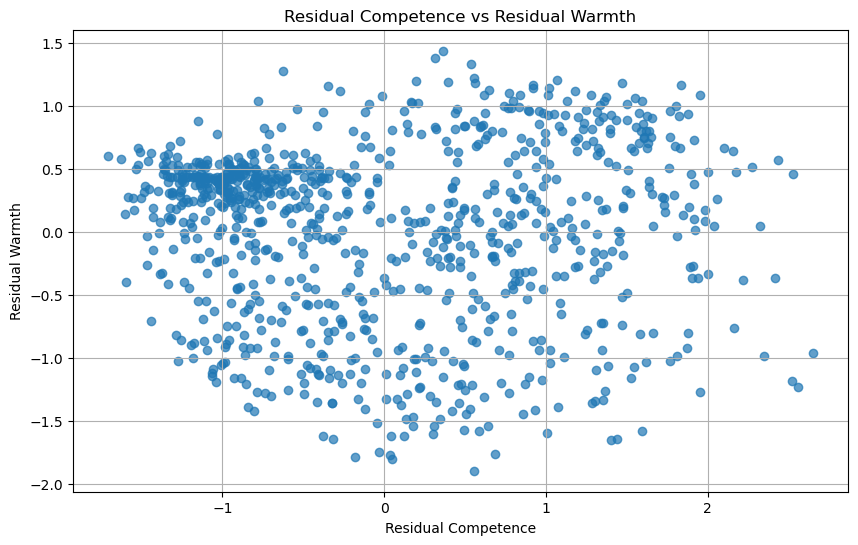

In [311]:
import matplotlib.pyplot as plt

# residuals for competence vs. warmth
plt.figure(figsize=(10, 6))
plt.scatter(df_pivot['Competence_residual'], df_pivot['Warmth_residual'], alpha=0.7)
plt.xlabel('Residual Competence')
plt.ylabel('Residual Warmth')
plt.title('Residual Competence vs Residual Warmth')
plt.grid(True)
plt.show()

In [23]:
#30 rows to check
print(df_pivot[['Title', 'Competence', 'Competence_residual', 'Warmth', 'Warmth_residual']].iloc[5:35])

                                                Title  Competence  \
5              Adapted Physical Education Specialists      0.0251   
6      Adhesive Bonding Machine Operators and Tenders     -1.4313   
7   Administrative Law Judges, Adjudicators, and H...      0.5365   
8                    Administrative Services Managers     -0.8137   
9   Adult Basic Education, Adult Secondary Educati...      0.2251   
10               Advanced Practice Psychiatric Nurses      1.4740   
11                           Advertising Sales Agents     -0.5861   
12                Advertising and Promotions Managers     -0.3694   
13  Aerospace Engineering and Operations Technolog...     -0.0773   
14                                Aerospace Engineers      0.8237   
15  Agents and Business Managers of Artists, Perfo...     -0.2920   
16                             Agricultural Engineers      0.8787   
17                   Agricultural Equipment Operators     -1.1341   
18                            Agri

In [313]:
#residuals == onthologically uncorrelated
# Finding the maximum values for 'Warmth_residual' and 'Competence_residual'
max_warmth_residual = df_pivot['Warmth_residual'].max()
max_competence_residual = df_pivot['Competence_residual'].max()

#maximum values
print(f"Max Warmth Residual: {max_warmth_residual}")
print(f"Max Competence Residual: {max_competence_residual}")


Max Warmth Residual: 1.4372794783660199
Max Competence Residual: 2.648640282689516


In [27]:
# minimum values for warmth residual and competence residual
min_warmth_residual = df_pivot['Warmth_residual'].min()
min_competence_residual = df_pivot['Competence_residual'].min()

print(f"Min Warmth Residual: {min_warmth_residual}")
print(f"Min Competence Residual: {min_competence_residual}")

Min Warmth Residual: -1.8981069955172458
Min Competence Residual: -1.7048006636629092


In [315]:
#sorting
df_sorted = df_pivot.sort_values(by=['Warmth_residual', 'Competence_residual'], ascending=[False, False])

#checking
print(df_sorted[['Title', 'Warmth_residual', 'Competence_residual']].head())


                                                 Title  Warmth_residual  \
5               adapted physical education specialists         1.437279   
669                      physical therapist assistants         1.381106   
275                      emergency medical technicians         1.328390   
29   ambulance drivers and attendants, except emerg...         1.275353   
54                                   athletic trainers         1.216933   

     Competence_residual  
5               0.361041  
669             0.311552  
275             0.535628  
29             -0.624681  
54              0.553206  


In [317]:
#to check
print(df_sorted[['Title', 'Warmth_residual', 'Competence_residual']].head(50))

                                                 Title  Warmth_residual  \
5               adapted physical education specialists         1.437279   
669                      physical therapist assistants         1.381106   
275                      emergency medical technicians         1.328390   
29   ambulance drivers and attendants, except emerg...         1.275353   
54                                   athletic trainers         1.216933   
711                            psychiatric technicians         1.201907   
438                                  home health aides         1.200754   
611                    occupational therapy assistants         1.189610   
225                                  dental hygienists         1.180430   
415         health specialties teachers, postsecondary         1.178148   
667    physical medicine and rehabilitation physicians         1.168632   
638                                         paramedics         1.163459   
668                      

In [319]:
#sorting
df_sorted = df_pivot.sort_values(by=['Competence_residual', 'Warmth_residual'], ascending=[False, False])

#jiust to check
print(df_sorted[['Title', 'Competence_residual', 'Warmth_residual']].head())


                              Title  Competence_residual  Warmth_residual
685            political scientists             2.648640        -0.959547
249                      economists             2.555525        -1.234019
592              neuropsychologists             2.523803         0.457036
143  climate change policy analysts             2.521315        -1.186374
145     clinical neuropsychologists             2.431298         0.570571


In [321]:
#unique titles
job_titles = df_pivot['Title'].unique()

#job titles
for job in job_titles:
    print(job)

accountants and auditors
actors
actuaries
acupuncturists
acute care nurses
adapted physical education specialists
adhesive bonding machine operators and tenders
administrative law judges, adjudicators, and hearing officers
administrative services managers
adult basic education, adult secondary education, and english as a second language instructors
advanced practice psychiatric nurses
advertising sales agents
advertising and promotions managers
aerospace engineering and operations technologists and technicians
aerospace engineers
agents and business managers of artists, performers, and athletes
agricultural engineers
agricultural equipment operators
agricultural inspectors
agricultural sciences teachers, postsecondary
agricultural technicians
air traffic controllers
aircraft cargo handling supervisors
aircraft mechanics and service technicians
aircraft service attendants
aircraft structure, surfaces, rigging, and systems assemblers
airfield operations specialists
airline pilots, copilo

In [323]:
#title col to lowercase
df_pivot['Title'] = df_pivot['Title'].str.lower()
df_pivot

,Title,Artistic,Conventional,Enterprising,First Interest High-Point,Investigative,Realistic,Second Interest High-Point,Social,Third Interest High-Point,Competence,Warmth,Competence_residual,Warmth_residual,Grouped_Title
0,accountants and auditors,1.09,7.00,3.86,6.0,3.57,1.14,5.0,2.13,2.0,-0.0758,0.0575,0.319752,-1.352473,accountants and auditors
1,actors,7.00,1.67,4.00,3.0,2.13,2.31,4.0,4.10,5.0,0.1727,0.9285,0.549647,-0.484053,actors
2,actuaries,1.18,6.24,3.41,6.0,4.44,1.81,2.0,2.47,5.0,0.3866,0.4339,0.774112,-0.980874,actuaries
3,acupuncturists,2.12,3.11,1.77,4.0,5.32,4.60,2.0,5.70,1.0,0.9327,2.5099,1.275869,1.089456,acupuncturists
4,acute care nurses,1.48,3.49,1.62,4.0,5.41,4.04,2.0,5.87,1.0,1.0135,2.4571,1.357797,1.035817,acute care nurses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,wind turbine service technicians,1.00,4.30,1.78,1.0,3.57,7.00,6.0,1.61,2.0,-0.7440,1.8397,-0.386516,0.436665,wind turbine service technicians
919,"woodworking machine setters, operators, and te...",1.15,4.15,1.03,1.0,2.43,7.00,6.0,1.18,0.0,-1.2795,1.8789,-0.922853,0.481425,"woodworking machine setters, operators, and te..."
920,word processors and typists,2.22,6.60,1.92,6.0,1.93,2.87,0.0,2.27,0.0,-1.1844,0.9796,-0.808544,-0.418862,word processors and typists
921,writers and authors,6.93,3.18,4.80,3.0,3.26,1.00,5.0,2.84,0.0,0.6786,0.0264,1.074816,-1.391406,writers and authors


In [327]:
#to check:
# doctor related titles for jobs
doctor_titles = [
    'physicians', 'surgeons', 'pediatricians', 'obstetricians', 
    'orthopedic surgeons', 'anesthesiologists', 'epidemiologists',
    'oral and maxillofacial surgeons', 'psychiatrists', 'radiologists', 
    'dermatologists', 'cardiologists'
]

#filtering
doctor_df = df_pivot[df_pivot['Title'].apply(lambda x: any(doctor_title in x.lower() for doctor_title in doctor_titles))]

#grouped_title' to group doctor-related titles as doctor
df_pivot['Grouped_Title'] = df_pivot['Title'].apply(
    lambda x: 'Doctor' if any(doctor_title in x.lower() for doctor_title in doctor_titles) else x
)

#I aggregated data by grouped title col and calculated the mean of residuals (to get 1 record for doctors as there are different doctors)
doctor_grouped_df = df_pivot.groupby('Grouped_Title').agg(
    Warmth_residual=('Warmth_residual', 'mean'),
    Competence_residual=('Competence_residual', 'mean')
).reset_index()
#just to check what happens
print(doctor_grouped_df[['Grouped_Title', 'Warmth_residual', 'Competence_residual']])

                                         Grouped_Title  Warmth_residual  \
0                                               Doctor         0.735134   
1                             accountants and auditors        -1.352473   
2                                               actors        -0.484053   
3                                            actuaries        -0.980874   
4                                       acupuncturists         1.089456   
..                                                 ...              ...   
899                   wind turbine service technicians         0.436665   
900  woodworking machine setters, operators, and te...         0.481425   
901                        word processors and typists        -0.418862   
902                                writers and authors        -1.391406   
903                 zoologists and wildlife biologists         0.130164   

     Competence_residual  
0               1.655279  
1               0.319752  
2               0.

In [207]:
# based on the preivious check
doctor_titles = [
    'physicians', 'surgeons', 'pediatricians', 'obstetricians', 
    'orthopedic surgeons', 'anesthesiologists', 'epidemiologists',
    'oral and maxillofacial surgeons', 'psychiatrists', 'radiologists', 
    'dermatologists', 'cardiologists'
]

#filter for doctor related
doctor_df = df_pivot[df_pivot['Title'].isin(doctor_titles)]

#new column grouped_title to group all doctor related titles as doctor
df_pivot['Grouped_Title'] = df_pivot['Title'].apply(lambda x: 'Doctor' if any(doctor_title in x for doctor_title in doctor_titles) else x)

#I aggregated data by grouped title col and calculated the mean of residuals (to get 1 record for doctors as there are different doctors)
doctor_grouped_df = df_pivot.groupby('Grouped_Title').agg(
    Warmth_residual=('Warmth_residual', 'mean'),
    Competence_residual=('Competence_residual', 'mean')
).reset_index()

#extract
doctor_only_df = doctor_grouped_df[doctor_grouped_df['Grouped_Title'] == 'Doctor']

print(doctor_only_df[['Grouped_Title', 'Warmth_residual', 'Competence_residual']])

doctor_only_df.to_excel('/Users/aleksandragarbat/Desktop/Thesis/doctor_grouped.xlsx', index=False)

  Grouped_Title  Warmth_residual  Competence_residual
0        Doctor         0.735134             1.655279


In [211]:
#teacher
#filter for teacher related jobs
teacher_records = df_pivot[df_pivot['Title'].str.contains('teacher', case=False)]

#new column as teacher
df_pivot['Grouped_Title'] = df_pivot['Title'].apply(lambda x: 'Teacher' if 'teacher' in x.lower() else x)

#aggregated and calculated the mean of residuals
teacher_grouped_df = df_pivot.groupby('Grouped_Title').agg(
    Warmth_residual=('Warmth_residual', 'mean'),
    Competence_residual=('Competence_residual', 'mean')
).reset_index()

#extract
teacher_only_grouped_df = teacher_grouped_df[teacher_grouped_df['Grouped_Title'] == 'Teacher']

print(teacher_only_grouped_df[['Grouped_Title', 'Warmth_residual', 'Competence_residual']])
#ssave to excel to check 
teacher_only_grouped_df.to_excel('/Users/aleksandragarbat/Desktop/Thesis/teacher_grouped.xlsx', index=False)

  Grouped_Title  Warmth_residual  Competence_residual
0       Teacher         0.821966             1.257614


In [215]:
#nurse
#filter
nurse_records = df_pivot[df_pivot['Title'].str.contains('nurse', case=False)]

#new column grouped_title
df_pivot['Grouped_Title'] = df_pivot['Title'].apply(lambda x: 'Nurse' if 'nurse' in x.lower() else x)

#aggregate and calculate the mean of resid.
nurse_grouped_df = df_pivot.groupby('Grouped_Title').agg(
    Warmth_residual=('Warmth_residual', 'mean'),
    Competence_residual=('Competence_residual', 'mean')
).reset_index()

#extract
nurse_only_grouped_df = nurse_grouped_df[nurse_grouped_df['Grouped_Title'] == 'Nurse']

print(nurse_only_grouped_df[['Grouped_Title', 'Warmth_residual', 'Competence_residual']])
#save
nurse_only_grouped_df.to_excel('/Users/aleksandragarbat/Desktop/Thesis/nurse_grouped.xlsx', index=False)

  Grouped_Title  Warmth_residual  Competence_residual
0         Nurse         0.700365             0.888507


In [176]:
#paramedic
paramedic_records = df_pivot[df_pivot['Title'].str.contains('paramedic')]

print(paramedic_records[['Title', 'Warmth_residual', 'Competence_residual']])
#only 1 record so no need to aggregate

          Title  Warmth_residual  Competence_residual
638  paramedics         1.163459             0.917667


In [329]:
#assign grouped_title (it does not need to be aggrregates)
paramedic_records.loc[:, 'Grouped_Title'] = 'Paramedic'

#select columns I need
paramedic_records_to_save = paramedic_records[['Grouped_Title', 'Warmth_residual', 'Competence_residual']]

#verification
print(paramedic_records_to_save)

#save to check
paramedic_records_to_save.to_excel('/Users/aleksandragarbat/Desktop/Thesis/paramedic_records.xlsx', index=False)


    Grouped_Title  Warmth_residual  Competence_residual
638     Paramedic         1.163459             0.917667


In [331]:
#childcare worker
childcare_worker_records = df_pivot[df_pivot['Title'].str.contains('childcare worker')]

print(childcare_worker_records[['Title', 'Warmth_residual', 'Competence_residual']])

                 Title  Warmth_residual  Competence_residual
134  childcare workers         0.606065            -0.563396


In [333]:
# assign grouped_title for childcare worker
childcare_worker_records.loc[:, 'Grouped_Title'] = 'Childcare Worker'

#select columns
childcare_worker_records_to_save = childcare_worker_records[['Grouped_Title', 'Warmth_residual', 'Competence_residual']]

print(childcare_worker_records_to_save)

#check
childcare_worker_records_to_save.to_excel('/Users/aleksandragarbat/Desktop/Thesis/childcare_worker_records.xlsx', index=False)


        Grouped_Title  Warmth_residual  Competence_residual
134  Childcare Worker         0.606065            -0.563396


In [335]:
#maid
maid_records = df_pivot[df_pivot['Title'].str.contains('maid')]

print(maid_records[['Title', 'Warmth_residual', 'Competence_residual']])


                                                 Title  Warmth_residual  \
473  janitors and cleaners, except maids and housek...         0.576617   
514                    maids and housekeeping cleaners         0.528958   

     Competence_residual  
473            -1.627031  
514            -1.524035  


In [223]:
#filter for maid
maid_records = df_pivot[df_pivot['Title'].str.contains('maid', case=False)]

#create a new column, add maid terms as maid
df_pivot['Grouped_Title'] = df_pivot['Title'].apply(lambda x: 'Maid' if 'maid' in x.lower() else x)

#aggregate and get mean of resid.
maid_grouped_df = df_pivot.groupby('Grouped_Title').agg(
    Warmth_residual=('Warmth_residual', 'mean'),
    Competence_residual=('Competence_residual', 'mean')
).reset_index()

#extract
maid_only_grouped_df = maid_grouped_df[maid_grouped_df['Grouped_Title'] == 'Maid']

print(maid_only_grouped_df[['Grouped_Title', 'Warmth_residual', 'Competence_residual']])
#check
maid_only_grouped_df.to_excel('/Users/aleksandragarbat/Desktop/Thesis/maid_grouped.xlsx', index=False)

  Grouped_Title  Warmth_residual  Competence_residual
0          Maid         0.552788            -1.575533


In [183]:
#waiter
waiter_records = df_pivot[df_pivot['Title'].str.contains('waiter')]

print(waiter_records[['Title', 'Warmth_residual', 'Competence_residual']])
#only 1

                      Title  Warmth_residual  Competence_residual
901  waiters and waitresses         0.161364            -1.073782


In [279]:
#assign
waiter_records.loc[:, 'Grouped_Title'] = 'Waiter'

#select columns i need
waiter_records_to_save = waiter_records[['Grouped_Title', 'Warmth_residual', 'Competence_residual']]

#verify
print(waiter_records_to_save)

#check
waiter_records_to_save.to_excel('/Users/aleksandragarbat/Desktop/Thesis/waiter_records.xlsx', index=False)


    Grouped_Title  Warmth_residual  Competence_residual
901        Waiter         0.161364            -1.073782


In [337]:
#bartender
bartender_records = df_pivot[df_pivot['Title'].str.contains('bartender')]

print(bartender_records[['Title', 'Warmth_residual', 'Competence_residual']])


                                                 Title  Warmth_residual  \
73                                          bartenders         0.073508   
236  dining room and cafeteria attendants and barte...         0.625949   

     Competence_residual  
73             -1.239868  
236            -1.438527  


In [225]:
#filter
bartender_records = df_pivot[df_pivot['Title'].str.contains('bartender', case=False)]

#create column
df_pivot['Grouped_Title'] = df_pivot['Title'].apply(lambda x: 'Bartender' if 'bartender' in x.lower() else x)

#gggregated + mean of residuals
bartender_grouped_df = df_pivot.groupby('Grouped_Title').agg(
    Warmth_residual=('Warmth_residual', 'mean'),
    Competence_residual=('Competence_residual', 'mean')
).reset_index()

#extract
bartender_only_grouped_df = bartender_grouped_df[bartender_grouped_df['Grouped_Title'] == 'Bartender']

print(bartender_only_grouped_df[['Grouped_Title', 'Warmth_residual', 'Competence_residual']])
#check
bartender_only_grouped_df.to_excel('/Users/aleksandragarbat/Desktop/Thesis/bartender_grouped.xlsx', index=False)

  Grouped_Title  Warmth_residual  Competence_residual
0     Bartender         0.349728            -1.339197


In [237]:
#engineer
engineer_records = df_pivot[df_pivot['Title'].str.contains('engineer')]
#lots of records
print(engineer_records[['Title', 'Warmth_residual', 'Competence_residual']])

                                                 Title  Warmth_residual  \
13   aerospace engineering and operations technolog...         0.188243   
14                                 aerospace engineers        -0.273413   
16                              agricultural engineers         0.060116   
27      airline pilots, copilots, and flight engineers        -0.319989   
45              architectural and engineering managers        -1.210236   
61                  automotive engineering technicians         0.345016   
62                                automotive engineers         0.134966   
78               bioengineers and biomedical engineers         0.505850   
90                                blockchain engineers        -0.859816   
125                                 chemical engineers         0.062547   
137    civil engineering technologists and technicians         0.080817   
138                                    civil engineers         0.066196   
162                      

In [227]:
#filter
engineer_records = df_pivot[df_pivot['Title'].str.contains('engineer', case=False)]

#new column
df_pivot['Grouped_Title'] = df_pivot['Title'].apply(lambda x: 'Engineer' if 'engineer' in x.lower() else x)

#aggregation and mean of resid.
engineer_grouped_df = df_pivot.groupby('Grouped_Title').agg(
    Warmth_residual=('Warmth_residual', 'mean'),
    Competence_residual=('Competence_residual', 'mean')
).reset_index()

#get data
engineer_only_grouped_df = engineer_grouped_df[engineer_grouped_df['Grouped_Title'] == 'Engineer']

print(engineer_only_grouped_df[['Grouped_Title', 'Warmth_residual', 'Competence_residual']])
#check 
engineer_only_grouped_df.to_excel('/Users/aleksandragarbat/Desktop/Thesis/engineer_grouped.xlsx', index=False)

  Grouped_Title  Warmth_residual  Competence_residual
0      Engineer         -0.03851             0.640317


In [189]:
#lawyer
lawyer_records = df_pivot[df_pivot['Title'].str.contains('lawyer')]
#only 1
print(lawyer_records[['Title', 'Warmth_residual', 'Competence_residual']])

       Title  Warmth_residual  Competence_residual
485  lawyers        -1.332911             1.353304


In [275]:
#assign
lawyer_records.loc[:, 'Grouped_Title'] = 'Lawyer'

#get columns
lawyer_records_to_save = lawyer_records[['Grouped_Title', 'Warmth_residual', 'Competence_residual']]

print(lawyer_records_to_save)
#check
lawyer_records_to_save.to_excel('/Users/aleksandragarbat/Desktop/Thesis/lawyer_records.xlsx', index=False)

    Grouped_Title  Warmth_residual  Competence_residual
485        Lawyer        -1.332911             1.353304


In [191]:
#scientist
scientist_records = df_pivot[df_pivot['Title'].str.contains('scientist')]

print(scientist_records[['Title', 'Warmth_residual', 'Competence_residual']])


                                                 Title  Warmth_residual  \
36                                   animal scientists         0.013628   
55                    atmospheric and space scientists        -0.076217   
82                           bioinformatics scientists        -0.278345   
172       computer and information research scientists        -0.365838   
176                            conservation scientists         0.032388   
219                                    data scientists        -0.767919   
291  environmental scientists and specialists, incl...        -0.031961   
360                  food scientists and technologists        -0.067516   
400  geoscientists, except hydrologists and geograp...         0.297963   
529                               materials scientists         0.002039   
546         medical scientists, except epidemiologists         0.171452   
685                               political scientists        -0.959547   
749        remote sensing

In [229]:
#scientist
#filter
scientist_records = df_pivot[df_pivot['Title'].str.contains('scientist', case=False)]

#new column
df_pivot['Grouped_Title'] = df_pivot['Title'].apply(lambda x: 'Scientist' if 'scientist' in x.lower() else x)

#gagregated and calculate the mean of resid.
scientist_grouped_df = df_pivot.groupby('Grouped_Title').agg(
    Warmth_residual=('Warmth_residual', 'mean'),
    Competence_residual=('Competence_residual', 'mean')
).reset_index()

#extraction
scientist_only_grouped_df = scientist_grouped_df[scientist_grouped_df['Grouped_Title'] == 'Scientist']

print(scientist_only_grouped_df[['Grouped_Title', 'Warmth_residual', 'Competence_residual']])
#check
scientist_only_grouped_df.to_excel('/Users/aleksandragarbat/Desktop/Thesis/scientist_grouped.xlsx', index=False)

  Grouped_Title  Warmth_residual  Competence_residual
0     Scientist        -0.133292             1.710346


In [263]:
#word C.E.O. = chef executives
ceo_records = df_pivot[df_pivot['Title'].str.contains('chief executive', case=False)]

print(ceo_records[['Title', 'Warmth_residual', 'Competence_residual']])


                Title  Warmth_residual  Competence_residual
131  chief executives         -1.57887              0.58433


In [271]:
#assign
ceo_records.loc[:, 'Grouped_Title'] = 'ceo'

#select cols
ceo_records_to_save = ceo_records[['Grouped_Title', 'Warmth_residual', 'Competence_residual']]

print(ceo_records_to_save)

#check
ceo_records_to_save.to_excel('/Users/aleksandragarbat/Desktop/Thesis/ceo_records.xlsx', index=False)

    Grouped_Title  Warmth_residual  Competence_residual
131           ceo         -1.57887              0.58433


In [339]:
#garbage collector/waste collector/recyclable material collectors
garbage_collector_records = df_pivot[df_pivot['Title'].str.contains('refuse and recyclable material collectors', case=False)]

print(garbage_collector_records[['Title', 'Warmth_residual', 'Competence_residual']])


                                         Title  Warmth_residual  \
743  refuse and recyclable material collectors         0.430973   

     Competence_residual  
743            -1.311489  


In [341]:
#assign for garbage collector
garbage_collector_records.loc[:, 'Grouped_Title'] = 'Garbage Collector'

#just to verify
#print(garbage_collector_records[['Grouped_Title', 'Warmth_residual', 'Competence_residual']])

#select columns
garbage_collector_records_to_save = garbage_collector_records[['Grouped_Title', 'Warmth_residual', 'Competence_residual']]

#show resulst
print(garbage_collector_records_to_save)

garbage_collector_records_to_save.to_excel('/Users/aleksandragarbat/Desktop/Thesis/garbage_collector_records.xlsx', index=False)

         Grouped_Title  Warmth_residual  Competence_residual
743  Garbage Collector         0.430973            -1.311489


In [291]:
#factory/production worker
factory_worker_records = df_pivot[df_pivot['Title'].str.contains('production worker', case=False)]

print(factory_worker_records[['Title', 'Warmth_residual', 'Competence_residual']])


                           Title  Warmth_residual  Competence_residual
429  helpers--production workers         0.365635            -1.479756


In [297]:
#factory worker
df_pivot['Grouped_Title'] = df_pivot['Title'].apply(lambda x: 'Factory/Production Worker' if 'production worker' in x.lower() else x)

#aggregate and calculate
factory_worker_grouped_df = df_pivot.groupby('Grouped_Title').agg(
    Warmth_residual=('Warmth_residual', 'mean'),
    Competence_residual=('Competence_residual', 'mean')
).reset_index()

#extract
factory_worker_only_grouped_df = factory_worker_grouped_df[factory_worker_grouped_df['Grouped_Title'] == 'Factory/Production Worker']

print(factory_worker_only_grouped_df[['Grouped_Title', 'Warmth_residual', 'Competence_residual']])

#check
factory_worker_only_grouped_df.to_excel('/Users/aleksandragarbat/Desktop/Thesis/factory_worker_grouped.xlsx', index=False)

               Grouped_Title  Warmth_residual  Competence_residual
0  Factory/Production Worker         0.365635            -1.479756


In [201]:
#bus driver
bus_driver_records = df_pivot[df_pivot['Title'].str.contains('bus driver', case=False)]

print(bus_driver_records[['Title', 'Warmth_residual', 'Competence_residual']])


                                  Title  Warmth_residual  Competence_residual
100                 bus drivers, school         0.875778            -1.148228
101  bus drivers, transit and intercity         0.559682            -1.459606


In [231]:
#filter
bus_driver_records = df_pivot[df_pivot['Title'].str.contains('bus driver', case=False)]

#new column
df_pivot['Grouped_Title'] = df_pivot['Title'].apply(lambda x: 'Bus Driver' if 'bus driver' in x.lower() else x)

#aggregate and calculate
bus_driver_grouped_df = df_pivot.groupby('Grouped_Title').agg(
    Warmth_residual=('Warmth_residual', 'mean'),
    Competence_residual=('Competence_residual', 'mean')
).reset_index()

bus_driver_only_grouped_df = bus_driver_grouped_df[bus_driver_grouped_df['Grouped_Title'] == 'Bus Driver']

print(bus_driver_only_grouped_df[['Grouped_Title', 'Warmth_residual', 'Competence_residual']])
#check
bus_driver_only_grouped_df.to_excel('/Users/aleksandragarbat/Desktop/Thesis/scientist_grouped.xlsx', index=False)

  Grouped_Title  Warmth_residual  Competence_residual
0    Bus Driver          0.71773            -1.303917


In [368]:
#cashier check
cashier_records = df_pivot[df_pivot['Title'].str.contains('cashier', case=False)]

#print(cashier_records[['Title', 'Competence', 'Warmth']])

#cashier data
cashier_records = df_pivot[df_pivot['Title'].str.contains('cashier', case=False)]

df_pivot['Grouped_Title'] = df_pivot['Title'].apply(lambda x: 'Cashier' if 'cashier' in x.lower() else x)

cashier_grouped_df = df_pivot.groupby('Grouped_Title').agg(
    Warmth_residual=('Warmth_residual', 'mean'),
    Competence_residual=('Competence_residual', 'mean')
).reset_index()

cashier_only_grouped_df = cashier_grouped_df[cashier_grouped_df['Grouped_Title'] == 'Cashier']

print(cashier_only_grouped_df[['Grouped_Title', 'Warmth_residual', 'Competence_residual']])

cashier_only_grouped_df.to_excel('/Users/aleksandragarbat/Desktop/Thesis/cashier_grouped.xlsx', index=False)


  Grouped_Title  Warmth_residual  Competence_residual
0       Cashier        -0.774651            -1.187159


In [431]:
#musician
df_pivot['Grouped_Title'] = df_pivot['Title'].apply(lambda x: 'Musician' if 'musician' in x.lower() else x)

musician_grouped_df = df_pivot.groupby('Grouped_Title').agg(
    Warmth_residual=('Warmth_residual', 'mean'),
    Competence_residual=('Competence_residual', 'mean')
).reset_index()

musician_only_grouped_df = musician_grouped_df[musician_grouped_df['Grouped_Title'] == 'Musician']

print(musician_only_grouped_df[['Grouped_Title', 'Warmth_residual', 'Competence_residual']])

musician_only_grouped_df.to_excel('/Users/aleksandragarbat/Desktop/Thesis/musician_grouped.xlsx', index=False)

  Grouped_Title  Warmth_residual  Competence_residual
0      Musician        -0.419765             0.010193


In [379]:
#architect data
architect_records = df_pivot[df_pivot['Title'].str.contains('architect', case=False)]

df_pivot['Grouped_Title'] = df_pivot['Title'].apply(lambda x: 'Architect' if 'architect' in x.lower() else x)

architect_grouped_df = df_pivot.groupby('Grouped_Title').agg(
    Warmth_residual=('Warmth_residual', 'mean'),
    Competence_residual=('Competence_residual', 'mean')
).reset_index()

architect_only_grouped_df = architect_grouped_df[architect_grouped_df['Grouped_Title'] == 'Architect']

print(architect_only_grouped_df[['Grouped_Title', 'Warmth_residual', 'Competence_residual']])

architect_only_grouped_df.to_excel('/Users/aleksandragarbat/Desktop/Thesis/architect_grouped.xlsx', index=False)


  Grouped_Title  Warmth_residual  Competence_residual
0     Architect        -0.258456             0.842551


In [466]:
#clerks
clerk_records = df_pivot[df_pivot['Title'].str.contains('clerk', case=False)]
#check
#print(clerk_records[['Title', 'Competence_residual', 'Warmth_residual']])

#aggregate and filter
clerk_records = df_pivot[df_pivot['Title'].str.contains('clerk', case=False)]

df_pivot['Grouped_Title'] = df_pivot['Title'].apply(lambda x: 'Clerk' if 'clerk' in x.lower() else x)

#aggregate and calculate mean of resid.
clerk_grouped_df = df_pivot.groupby('Grouped_Title').agg(
    Warmth_residual=('Warmth_residual', 'mean'),
    Competence_residual=('Competence_residual', 'mean')
).reset_index()

#extraction
clerk_only_grouped_df = clerk_grouped_df[clerk_grouped_df['Grouped_Title'] == 'Clerk']

print(clerk_only_grouped_df[['Grouped_Title', 'Warmth_residual', 'Competence_residual']])

clerk_only_grouped_df.to_excel('/Users/aleksandragarbat/Desktop/Thesis/clerk_grouped.xlsx', index=False)

  Grouped_Title  Warmth_residual  Competence_residual
0         Clerk        -0.838704             -0.79719


In [482]:
#travel agents
travel_agent_records = df_pivot[df_pivot['Title'].str.contains('travel agent', case=False)]
#only 1 recors
#print(travel_agent_records[['Title', 'Competence_residual', 'Warmth_residual']])

df_pivot['Grouped_Title'] = df_pivot['Title'].apply(lambda x: 'Travel Agent' if 'travel agent' in x.lower() else x)

travel_agent_grouped_df = df_pivot.groupby('Grouped_Title').agg(
    Warmth_residual=('Warmth_residual', 'mean'),
    Competence_residual=('Competence_residual', 'mean')
).reset_index()

travel_agent_only_grouped_df = travel_agent_grouped_df[travel_agent_grouped_df['Grouped_Title'] == 'Travel Agent']

print(travel_agent_only_grouped_df[['Grouped_Title', 'Warmth_residual', 'Competence_residual']])


travel_agent_only_grouped_df.to_excel('/Users/aleksandragarbat/Desktop/Thesis/travel_agent_grouped.xlsx', index=False)


  Grouped_Title  Warmth_residual  Competence_residual
0  Travel Agent        -1.082374            -0.456247


In [474]:
#retail jobs (sales ppl)
retail_records = df_pivot[df_pivot['Title'].str.contains('retail', case=False)]
#print(retail_records[['Title', 'Competence_residual', 'Warmth_residual']])

retail_records = df_pivot[df_pivot['Title'].str.contains('retail', case=False)]

df_pivot['Grouped_Title'] = df_pivot['Title'].apply(lambda x: 'Retail' if 'retail' in x.lower() else x)

retail_grouped_df = df_pivot.groupby('Grouped_Title').agg(
    Warmth_residual=('Warmth_residual', 'mean'),
    Competence_residual=('Competence_residual', 'mean')
).reset_index()

retail_only_grouped_df = retail_grouped_df[retail_grouped_df['Grouped_Title'] == 'Retail']

print(retail_only_grouped_df[['Grouped_Title', 'Warmth_residual', 'Competence_residual']])

retail_only_grouped_df.to_excel('/Users/aleksandragarbat/Desktop/Thesis/retail_grouped.xlsx', index=False)



  Grouped_Title  Warmth_residual  Competence_residual
0        Retail        -1.043142            -0.679969


In [500]:
#pilots
pilot_records = df_pivot[df_pivot['Title'].str.contains('pilot', case=False)]
#more than 1
#print(pilot_records[['Title', 'Warmth_residual', 'Competence_residual']])

df_pivot['Grouped_Title'] = df_pivot['Title'].apply(lambda x: 'Pilot' if 'pilot' in x.lower() else x)

pilot_grouped_df = df_pivot.groupby('Grouped_Title').agg(
    Warmth_residual=('Warmth_residual', 'mean'),
    Competence_residual=('Competence_residual', 'mean')
).reset_index()

pilot_only_grouped_df = pilot_grouped_df[pilot_grouped_df['Grouped_Title'] == 'Pilot']

print(pilot_only_grouped_df[['Grouped_Title', 'Warmth_residual', 'Competence_residual']])

pilot_only_grouped_df.to_excel('/Users/aleksandragarbat/Desktop/Thesis/pilot_grouped.xlsx', index=False)




  Grouped_Title  Warmth_residual  Competence_residual
0         Pilot        -0.331106            -0.395344


In [502]:
combined_df = pd.concat([
    bus_driver_only_grouped_df,
    scientist_only_grouped_df,
    engineer_only_grouped_df,
    bartender_only_grouped_df,
    maid_only_grouped_df,
    nurse_only_grouped_df,
    teacher_only_grouped_df,
    doctor_only_df,
    paramedic_records_to_save,
    garbage_collector_records_to_save,
    ceo_records_to_save,
    lawyer_records_to_save,
    waiter_records_to_save,
    childcare_worker_records_to_save,
    factory_worker_only_grouped_df,
    cashier_only_grouped_df,
    architect_only_grouped_df,
    musician_only_grouped_df,
    clerk_only_grouped_df,
    retail_only_grouped_df,
    travel_agent_only_grouped_df,
    pilot_only_grouped_df
], ignore_index=True)

#saved in 1 file (all other data was also excel so i put it in excel)
combined_df.to_excel('/Users/aleksandragarbat/Desktop/Thesis/combined_grouped_titles_summary.xlsx', index=False)


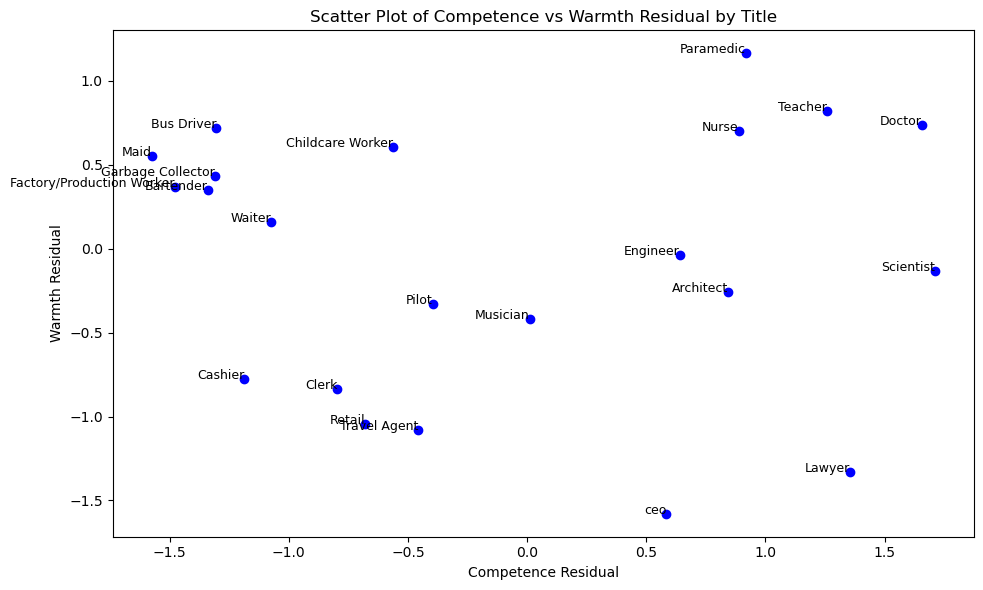

In [504]:
#plotted in 2D space from what i combined in combined df with all groups I selected
#the measures are in residuals
#there seems to not be any records of very low in both warmth and competence
#there are records with high warmth and v. low competence
#there are records with high warmth and high competence
#not many records of low warmth and high competence from what I selected (and it is correct when I compare with study- not many professions have such measures)
#not many in the middle
#

combined_df = pd.read_excel('/Users/aleksandragarbat/Desktop/Thesis/combined_grouped_titles_summary.xlsx')

plt.figure(figsize=(10, 6))

plt.scatter(combined_df['Competence_residual'], combined_df['Warmth_residual'], color='blue')

for i, row in combined_df.iterrows():
    plt.text(row['Competence_residual'], row['Warmth_residual'], row['Grouped_Title'], fontsize=9, ha='right')

plt.xlabel('Competence Residual')
plt.ylabel('Warmth Residual')
plt.title('Scatter Plot of Competence vs Warmth Residual by Title')

plt.tight_layout()
plt.show()

In [ ]:
#now i need to select the jobs I will use + direction of bias (slope) (when i use varied selection slope = approx. 0)
#so i have to think about it 
#also how many jobs should I use

In [568]:
combined_df2 = pd.concat([
    bus_driver_only_grouped_df,
    garbage_collector_records_to_save,
    ceo_records_to_save,
    lawyer_records_to_save,
    childcare_worker_records_to_save,
    architect_only_grouped_df,
], ignore_index=True)

combined_df2.to_excel('/Users/aleksandragarbat/Desktop/Thesis/combined_grouped_titles_summary2.xlsx', index=False)

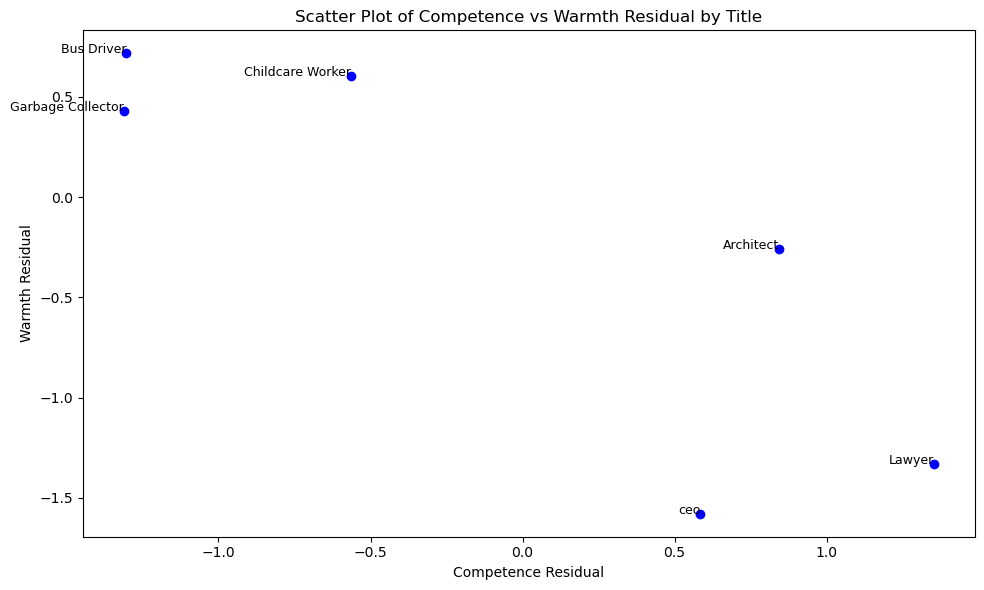

In [572]:
combined_df2 = pd.read_excel('/Users/aleksandragarbat/Desktop/Thesis/combined_grouped_titles_summary2.xlsx')

plt.figure(figsize=(10, 6))

plt.scatter(combined_df2['Competence_residual'], combined_df2['Warmth_residual'], color='blue')

for i, row in combined_df2.iterrows():
    plt.text(row['Competence_residual'], row['Warmth_residual'], row['Grouped_Title'], fontsize=9, ha='right')

plt.xlabel('Competence Residual')
plt.ylabel('Warmth Residual')
plt.title('Scatter Plot of Competence vs Warmth Residual by Title')

plt.tight_layout()
plt.show()


slope (Dir. of bias): -0.7401910245969396
intercept: -0.2850870717741175


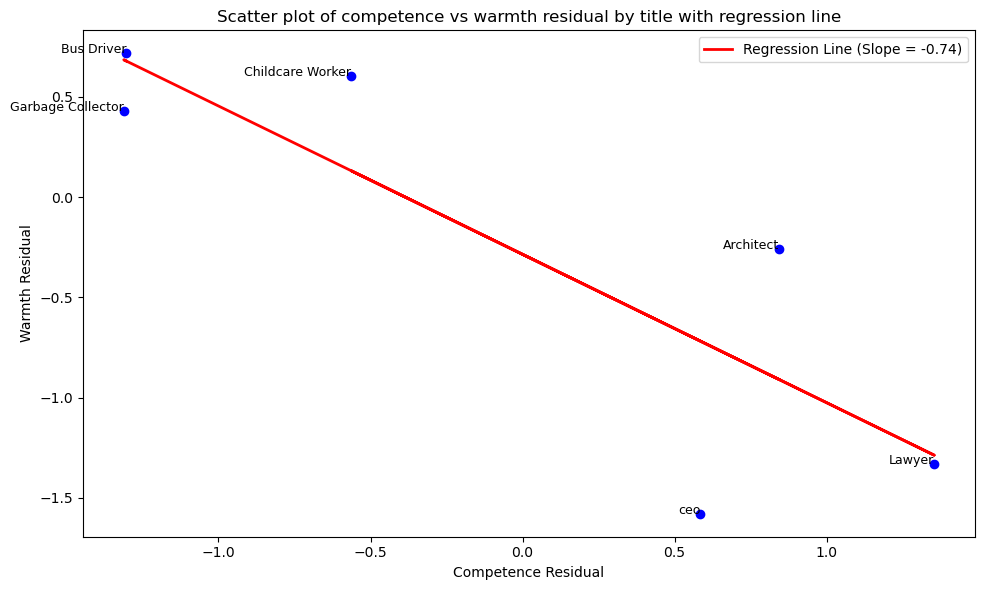

In [574]:

from sklearn.linear_model import LinearRegression
#i still use this df
#combined_df2 = pd.read_excel('/Users/aleksandragarbat/Desktop/Thesis/combined_grouped_titles_summary2.xlsx')
#indepe. variable (competence residual) and dep var. (warmth residual)
X = combined_df2['Competence_residual'].values.reshape(-1, 1)  # Independent variable (Competence Residual)
y = combined_df2['Warmth_residual'].values  # Dependent variable (Warmth Residual)

#fit lin. reg.
model = LinearRegression()
model.fit(X, y)

#I need a slope= direction of bias and I will get the intercept as well but its not useful
slope = model.coef_[0]
intercept = model.intercept_

print(f"slope (Dir. of bias): {slope}")
print(f"intercept: {intercept}")

#scatter
plt.figure(figsize=(10, 6))
plt.scatter(combined_df2['Competence_residual'], combined_df2['Warmth_residual'], color='blue')

#plotting the reg. line
#predicted val. of y using my created model
y_pred = model.predict(X)
plt.plot(combined_df2['Competence_residual'], y_pred, color='red', linewidth=2, label=f"Regression Line (Slope = {slope:.2f})")

#labels to points
for i, row in combined_df2.iterrows():
    plt.text(row['Competence_residual'], row['Warmth_residual'], row['Grouped_Title'], fontsize=9, ha='right')

#plot labels+ title
plt.xlabel('Competence Residual')
plt.ylabel('Warmth Residual')
plt.title('Scatter plot of competence vs warmth residual by title with regression line')


plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
#after ill select the final sample of jobs
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('')
#for examlpe
job_titles = ["CEO", "Nurse", "Waiter", "Engineer", "Teacher", "Doctor", "Lawyer", "Artist"]



                 Title  Competence  Warmth
407  graphic designers     -0.1584  0.6858


                                            Title  Competence  Warmth
489  librarians and media collections specialists     -0.0435  1.2001


Empty DataFrame
Columns: [Title, Competence, Warmth]
Index: []


                                              Title  Competence  Warmth
27   airline pilots, copilots, and flight engineers     -0.5365  1.0852
112    captains, mates, and pilots of water vessels     -0.9630  1.0124
154                               commercial pilots     -0.8082  1.1174


                                               Title  Competence  Warmth
240  dispatchers, except police, fire, and ambulance     -1.6913  1.4838
345  first-line supervisors of police and detectives     -0.7673  0.4172
682       police identification and records officers     -0.3759  1.0384
683             police and sheriff's patrol officers     -0.8069  1.4651
879                      transit and railroad police     -1.2452  1.5036


               Title  Competence  Warmth
778  security guards     -1.3841  1.7333
